# Problem Statement

# Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

# Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

# Importing the Required Libraries

In [79]:
import pandas as pd
import numpy as np

# Reading the Data Sets from the Local Disk

In [80]:
x=pd.read_csv("Downloads\\train_Df64byy.csv")
y=pd.read_csv("Downloads\\test_YCcRUnU.csv")

In [81]:
x.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [82]:
y.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


# Using for the Future Reference for Predections

In [83]:
k=y["ID"]

# EDA 

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 4835., 12137., 12509.,  9889.,  6100.,  2901.,  1599.,   677.,
          196.,    39.]),
 array([ 2280.  ,  6387.04, 10494.08, 14601.12, 18708.16, 22815.2 ,
        26922.24, 31029.28, 35136.32, 39243.36, 43350.4 ]),
 <BarContainer object of 10 artists>)

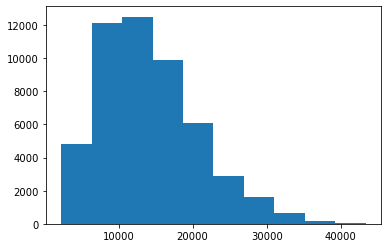

In [85]:
plt.hist(x["Reco_Policy_Premium"])

In [86]:
a=x["Accomodation_Type"].value_counts()

<BarContainer object of 2 artists>

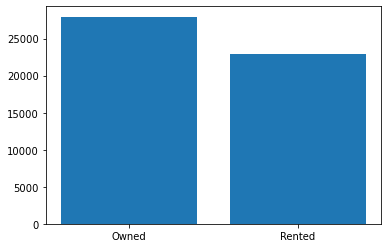

In [87]:
plt.bar(a.index,a.values)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

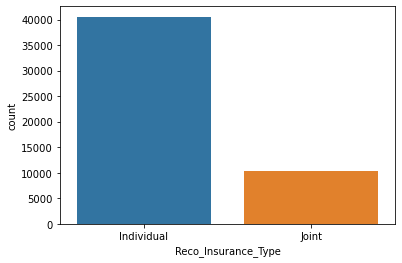

In [88]:
sns.countplot(x["Reco_Insurance_Type"])

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

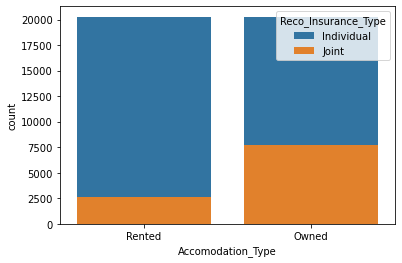

In [89]:
sns.countplot(x="Accomodation_Type",hue="Reco_Insurance_Type",data=x,dodge=False)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

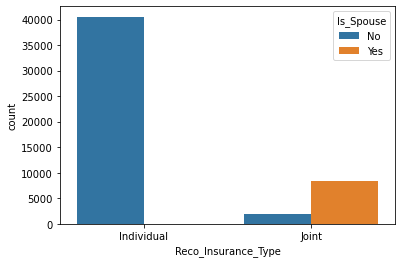

In [90]:
sns.countplot(x="Reco_Insurance_Type",hue="Is_Spouse",data=x)

Text(0, 0.5, 'COUNT')

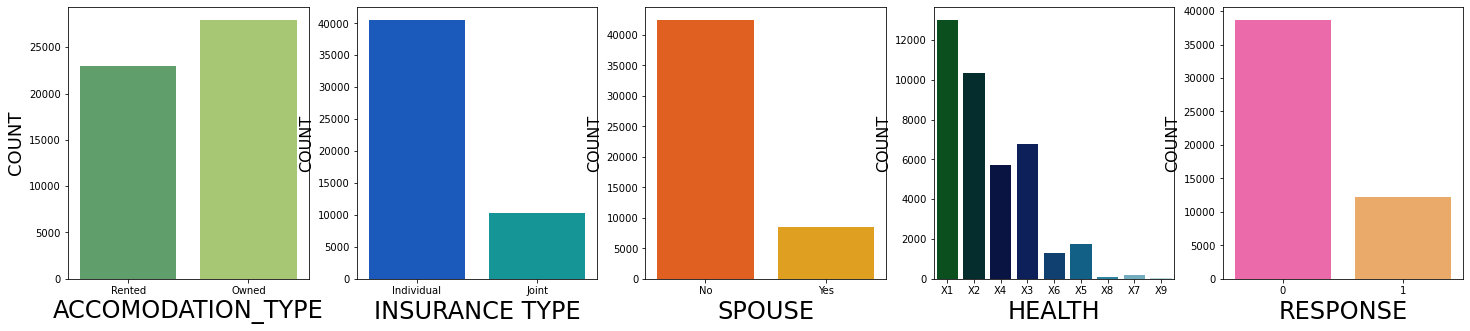

In [91]:
fig,ax=plt.subplots(ncols=5,figsize=(25,5))

sns.countplot(x["Accomodation_Type"],palette="summer",ax=ax[0])
ax[0].set_xlabel("ACCOMODATION_TYPE",fontsize=24)
ax[0].set_ylabel("COUNT",fontsize=18)

sns.countplot(x["Reco_Insurance_Type"],palette="winter",ax=ax[1])
ax[1].set_xlabel("INSURANCE TYPE",fontsize=24)
ax[1].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Is_Spouse"],palette="autumn",ax=ax[2])
ax[2].set_xlabel("SPOUSE",fontsize=24)
ax[2].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Health Indicator"],palette="ocean",ax=ax[3])
ax[3].set_xlabel("HEALTH",fontsize=24)
ax[3].set_ylabel("COUNT",fontsize=16)

sns.countplot(x["Response"],palette="spring",ax=ax[4])
ax[4].set_xlabel("RESPONSE",fontsize=24)
ax[4].set_ylabel("COUNT",fontsize=16)

([<matplotlib.patches.Wedge at 0x20aaf7d1190>,
 [Text(-0.801990102597584, 0.7528690957500624, '0'),
  Text(0.801990137841929, -0.7528690582061955, '1')],
 [Text(-0.4374491468714094, 0.41065587040912493, '76.0%'),
  Text(0.4374491660955976, -0.4106558499306521, '24.0%')])

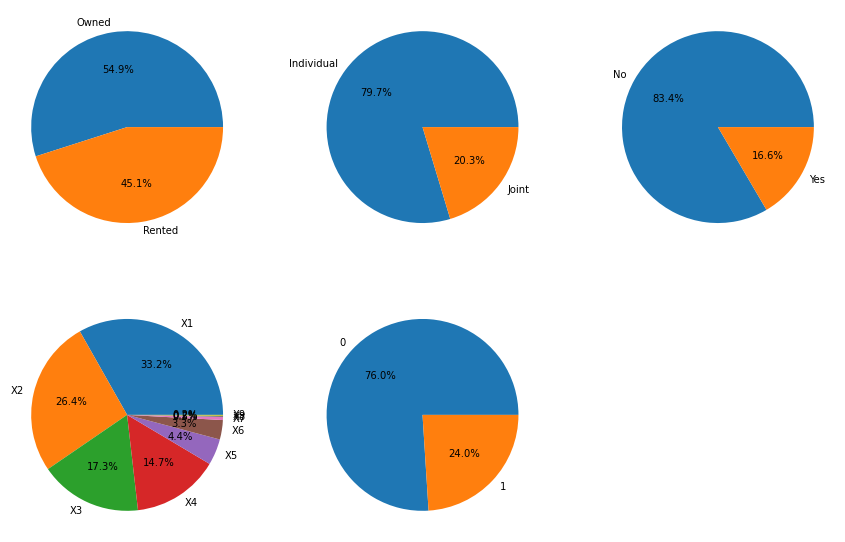

In [92]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
a=x["Accomodation_Type"].value_counts().values
b=x["Accomodation_Type"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")

plt.subplot(3,3,2)
a=x["Reco_Insurance_Type"].value_counts().values
b=x["Reco_Insurance_Type"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")

plt.subplot(3,3,3)
a=x["Is_Spouse"].value_counts().values
b=x["Is_Spouse"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")

plt.subplot(3,3,4)
a=x["Health Indicator"].value_counts().values
b=x["Health Indicator"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")

plt.subplot(3,3,5)
a=x["Response"].value_counts().values
b=x["Response"].value_counts().index
plt.pie(a,labels=b,autopct="%.1f%%")

Text(0.5, 0, 'POLICY')

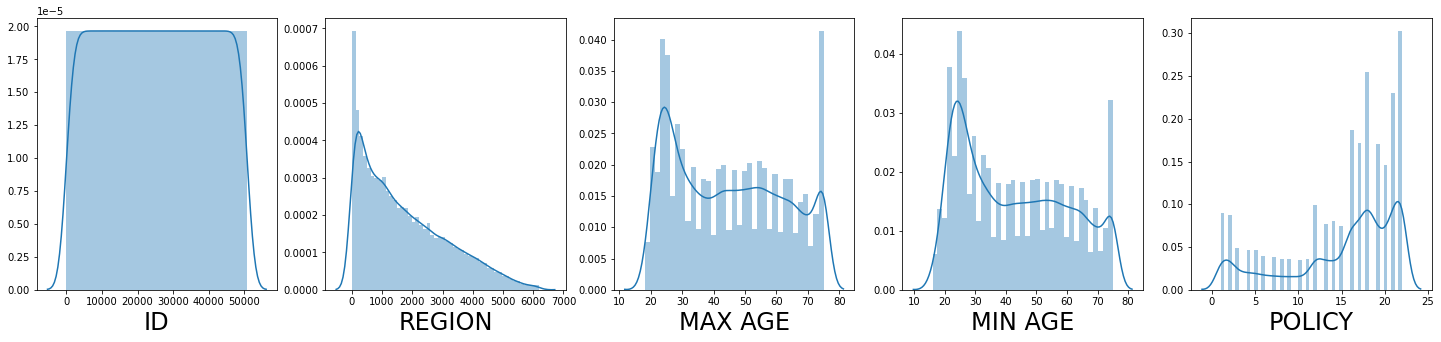

In [93]:
fig,ax=plt.subplots(ncols=5,figsize=(25,5))

sns.distplot(x["ID"],ax=ax[0])
ax[0].set_xlabel("ID",fontsize=24)

sns.distplot(x["Region_Code"],ax=ax[1])
ax[1].set_xlabel("REGION",fontsize=24)

sns.distplot(x["Upper_Age"],ax=ax[2])
ax[2].set_xlabel("MAX AGE",fontsize=24)

sns.distplot(x["Lower_Age"],ax=ax[3])
ax[3].set_xlabel("MIN AGE",fontsize=24)

sns.distplot(x["Reco_Policy_Cat"],ax=ax[4])
ax[4].set_xlabel("POLICY",fontsize=24)

# Concating Both Test and Train Files

In [94]:
y["Response"]=np.nan
x["data"]="train"
y["data"]="test"
z=pd.concat([x,y],axis=0)

# Discarding Irrevelant Variables

In [95]:
del z["ID"],z["City_Code"],z["Region_Code"]

# Data Pre-Processing or Data Wrangling

In [96]:
a=pd.value_counts(z["Health Indicator"])
b=(a/a.sum()*100).lt(18)
z["Health Indicator"]=np.where(z["Health Indicator"].isin(a[b].index),"X9",z["Health Indicator"])

In [97]:
z["Health Indicator"].fillna("X2",inplace=True)

In [98]:
z["Holding_Policy_Type"].fillna(4.0,inplace=True)

In [99]:
z["Response"].fillna(1.0,inplace=True)

In [100]:
z["Response"]=z["Response"].astype(int)

In [101]:
z["Holding_Policy_Duration"]=z["Holding_Policy_Duration"].str.replace("[^0-9]","",regex=True)

In [102]:
z["Holding_Policy_Duration"].fillna(5,inplace=True)

In [103]:
z["Holding_Policy_Duration"]=pd.to_numeric(z["Holding_Policy_Duration"])

In [104]:
x=z[z["data"]=="train"]
del x["data"]
y=z[z["data"]=="test"]
del y["Response"],y["data"]

In [105]:
del z

# Model Building

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Splitting the Data Into Train and Test

In [107]:
a,b=train_test_split(x,test_size=0.2,random_state=123)

# Splitting the Input and Output Variables

In [108]:
m=a.drop(["Response"],axis=1)
n=a["Response"]

# Traning The Model

In [109]:
g=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,max_depth=12,subsample=0.4,random_state=123)
rf=RandomForestClassifier(n_estimators=400,max_depth=8,max_features="auto",random_state=123)
dt=DecisionTreeClassifier(max_depth=8,max_features="auto",max_leaf_nodes=20,random_state=123)
l=LogisticRegression()
g1=GaussianNB()
k1=KNeighborsClassifier(n_neighbors=11)
m2=MLPClassifier(activation="relu",solver="adam",alpha=0.1,shuffle=True,random_state=123)
xg=XGBClassifier(n_estimators=500,learning_rate=0.1,subsample=0.2,max_depth=12,random_state=123,scale_pos_weight=1)

In [110]:
m=pd.get_dummies(m,drop_first=True)

In [111]:
g.fit(m,n)

GradientBoostingClassifier(max_depth=12, n_estimators=400, random_state=123,
                           subsample=0.4)

In [112]:
rf.fit(m,n)

RandomForestClassifier(max_depth=8, n_estimators=400, random_state=123)

In [113]:
dt.fit(m,n)

DecisionTreeClassifier(max_depth=8, max_features='auto', max_leaf_nodes=20,
                       random_state=123)

In [114]:
l.fit(m,n)

C:\Users\KATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
g1.fit(m,n)

GaussianNB()

In [117]:
k1.fit(m,n)

KNeighborsClassifier(n_neighbors=11)

In [118]:
m2.fit(m,n)

MLPClassifier(alpha=0.1, random_state=123)

In [119]:
xg.fit(m,n)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Making Predections

In [120]:
m1=b.drop(["Response"],axis=1)

In [121]:
m1=pd.get_dummies(m1,drop_first=True)

In [122]:
pred=g.predict(m1)
pred1=rf.predict(m1)
pred2=dt.predict(m1)
pred3=l.predict(m1)
pred4=g1.predict(m1)
pred5=k1.predict(m1)
pred6=m2.predict(m1)
pred7=xg.predict(m1)

# Visuvalising the Tree

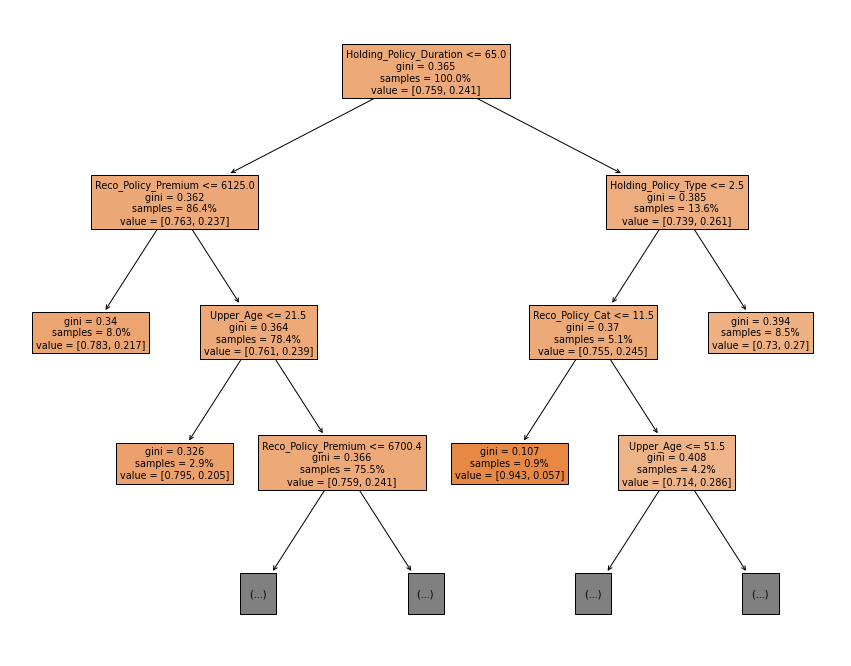

In [123]:
plt.figure(figsize=(15,12))
plot_tree(dt,feature_names=m.columns,filled=True,proportion=True,max_depth=3)
plt.show()

# Feature Importance Given Random Forest

<AxesSubplot:>

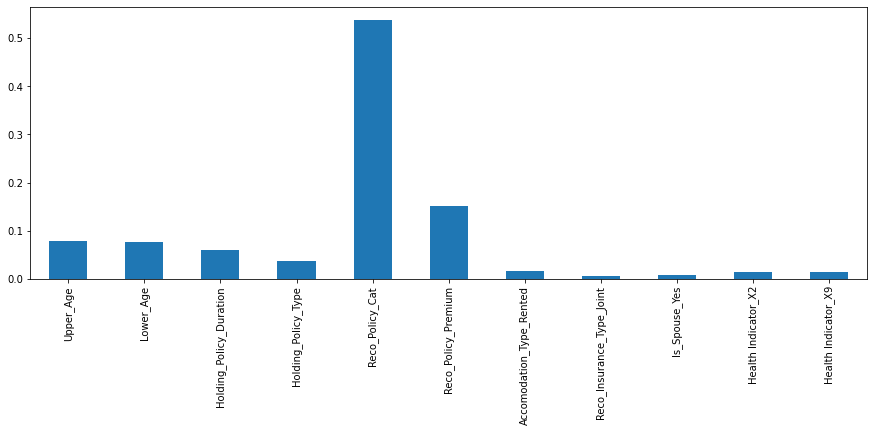

In [124]:
b1=pd.Series(rf.feature_importances_,index=m.columns)
b1.plot(kind="bar",figsize=(15,5))

# Performing Evulation Metrics

In [125]:
from sklearn.metrics import roc_auc_score

In [128]:
s=[]
auc=round(roc_auc_score(b["Response"],pred),2)
auc1=round(roc_auc_score(b["Response"],pred1),2)
auc2=round(roc_auc_score(b["Response"],pred2),2)
auc3=round(roc_auc_score(b["Response"],pred3),2)
auc4=round(roc_auc_score(b["Response"],pred4),2)
auc5=round(roc_auc_score(b["Response"],pred5),2)
auc6=round(roc_auc_score(b["Response"],pred6),2)
auc7=round(roc_auc_score(b["Response"],pred7),2)
s.append(auc)
s.append(auc1)
s.append(auc2)
s.append(auc3)
s.append(auc4)
s.append(auc5)
s.append(auc6)
s.append(auc7)

In [130]:
p=pd.DataFrame(s)
p.index=["GRADIENT BOOSTING","RANDOM FOREST","DECISION TREES","LOGISTIC REGRESSION","GAUSSIAN NAVIE BAYES","K-NEAREST NEIGHBOURS","MULTI LAYERED PERCEPTRON","XGBOOST"]
p.columns=["AUC-SCORE"]

<AxesSubplot:>

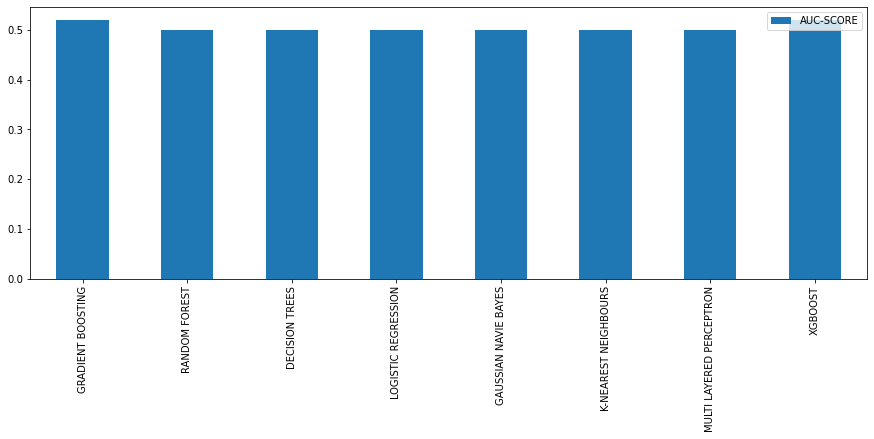

In [134]:
p.plot(kind="bar",figsize=(15,5))

# Predections on Test Side

In [136]:
x=pd.get_dummies(x,drop_first=True)

In [137]:
c=x.drop(["Response"],axis=1)
d=x["Response"]

In [138]:
g.fit(c,d)

GradientBoostingClassifier(max_depth=12, n_estimators=400, random_state=123,
                           subsample=0.4)

In [139]:
rf.fit(c,d)

RandomForestClassifier(max_depth=8, n_estimators=400, random_state=123)

In [140]:
dt.fit(c,d)

DecisionTreeClassifier(max_depth=8, max_features='auto', max_leaf_nodes=20,
                       random_state=123)

In [141]:
l.fit(c,d)

LogisticRegression()

In [142]:
g1.fit(c,d)

GaussianNB()

In [143]:
k1.fit(c,d)

KNeighborsClassifier(n_neighbors=11)

In [144]:
m2.fit(c,d)

MLPClassifier(alpha=0.1, random_state=123)

In [145]:
xg.fit(c,d)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
y=pd.get_dummies(y,drop_first=True)

In [148]:
p1=g.predict_proba(y) [:,1]
p2=rf.predict_proba(y) [:,1]
p3=dt.predict_proba(y) [:,1]
p4=l.predict_proba(y) [:,1]
p5=g1.predict_proba(y) [:,1]
p6=k1.predict_proba(y) [:,1]
p7=m2.predict_proba(y) [:,1]
p8=xg.predict_proba(y) [:,1]

In [149]:
c=pd.DataFrame(p1) 
c1=pd.DataFrame(p2)
c2=pd.DataFrame(p3)
c3=pd.DataFrame(p4)
c4=pd.DataFrame(p5)
c5=pd.DataFrame(p6)
c6=pd.DataFrame(p7)
c7=pd.DataFrame(p8)

In [150]:
c.columns=["Response"]
c1.columns=["Response"]
c2.columns=["Response"]
c3.columns=["Response"]
c4.columns=["Response"]
c5.columns=["Response"]
c6.columns=["Response"]
c7.columns=["Response"]

In [151]:
d=pd.concat([k,c],axis=1)
d1=pd.concat([k,c1],axis=1)
d2=pd.concat([k,c2],axis=1)
d3=pd.concat([k,c3],axis=1)
d4=pd.concat([k,c4],axis=1)
d5=pd.concat([k,c5],axis=1)
d6=pd.concat([k,c6],axis=1)
d7=pd.concat([k,c7],axis=1)

In [45]:
d.to_csv("Downloads\\submissions.csv",header=True,index=False)

In [154]:
d.head()

,ID,Response
0,50883,0.704785
1,50884,0.267856
2,50885,0.061359
3,50886,0.037186
4,50887,0.009262


In [155]:
d1.head()

,ID,Response
0,50883,0.262986
1,50884,0.232262
2,50885,0.255844
3,50886,0.230164
4,50887,0.229216


In [156]:
d2.head()

,ID,Response
0,50883,0.240475
1,50884,0.240475
2,50885,0.240475
3,50886,0.240475
4,50887,0.240475


In [157]:
d3.head()

,ID,Response
0,50883,0.224866
1,50884,0.200670
2,50885,0.243726
3,50886,0.297471
4,50887,0.138809


In [158]:
d4.head()

,ID,Response
0,50883,0.097966
1,50884,0.333182
2,50885,0.282499
3,50886,0.285278
4,50887,0.093540


In [159]:
d5.head()

,ID,Response
0,50883,0.454545
1,50884,0.363636
2,50885,0.363636
3,50886,0.181818
4,50887,0.000000


In [160]:
d6.head()

,ID,Response
0,50883,6.622567e-05
1,50884,4.240780e-09
2,50885,4.722635e-03
3,50886,1.264033e-02
4,50887,1.700006e-08


In [161]:
d7.head()

,ID,Response
0,50883,0.844423
1,50884,0.429884
2,50885,0.056336
3,50886,0.148348
4,50887,0.034801


# Roc-Curves for different models

In [162]:
from sklearn.metrics import roc_curve

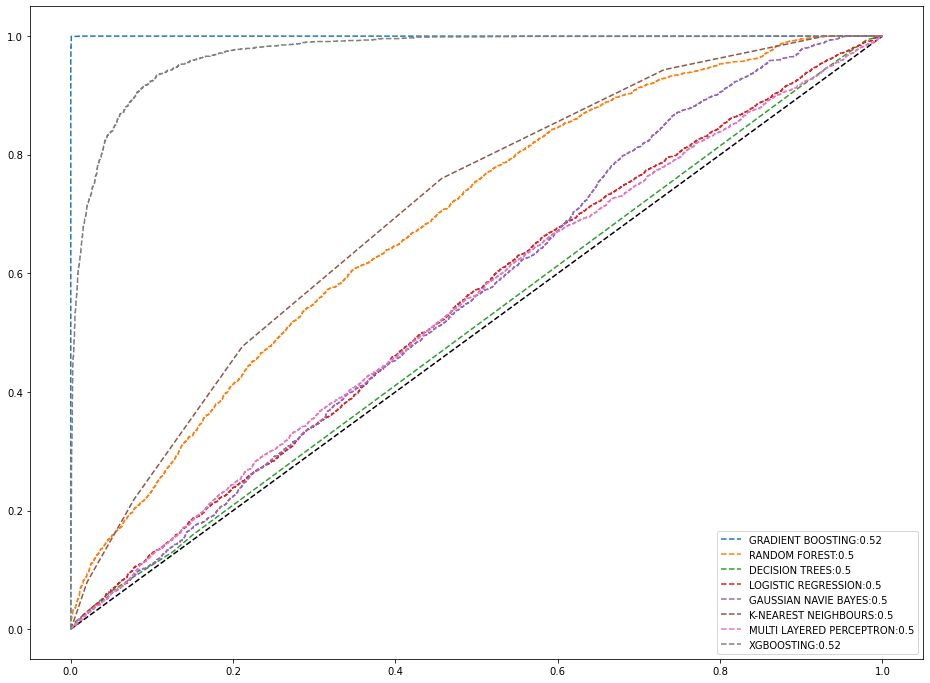

In [177]:
q=g.predict_proba(m1) [:,1]
q1=rf.predict_proba(m1) [:,1]
q2=dt.predict_proba(m1) [:,1]
q3=l.predict_proba(m1) [:,1]
q4=g1.predict_proba(m1) [:,1]
q5=k1.predict_proba(m1) [:,1]
q6=m2.predict_proba(m1) [:,1]
q7=xg.predict_proba(m1) [:,1]
fp,tp,t=roc_curve(b["Response"],q)
fp1,tp1,t1=roc_curve(b["Response"],q1)
fp2,tp2,t2=roc_curve(b["Response"],q2)
fp3,tp3,t3=roc_curve(b["Response"],q3)
fp4,tp4,t4=roc_curve(b["Response"],q4)
fp5,tp5,t5=roc_curve(b["Response"],q5)
fp6,tp6,t6=roc_curve(b["Response"],q6)
fp7,tp7,t7=roc_curve(b["Response"],q7)
plt.figure(figsize=(16,12))
plt.plot([0,1],[0,1],"k--")
plt.plot(fp,tp,"--",label="GRADIENT BOOSTING:" +str(round(roc_auc_score(b["Response"],pred*100),2)))
plt.plot(fp1,tp1,"--",label="RANDOM FOREST:" +str(round(roc_auc_score(b["Response"],pred1*100),2)))
plt.plot(fp2,tp2,"--",label="DECISION TREES:" +str(round(roc_auc_score(b["Response"],pred2*100),2)))
plt.plot(fp3,tp3,"--",label="LOGISTIC REGRESSION:" +str(round(roc_auc_score(b["Response"],pred3*100),2)))
plt.plot(fp4,tp4,"--",label="GAUSSIAN NAVIE BAYES:" +str(round(roc_auc_score(b["Response"],pred4*100),2)))
plt.plot(fp5,tp5,"--",label="K-NEAREST NEIGHBOURS:" +str(round(roc_auc_score(b["Response"],pred5*100),2)))
plt.plot(fp6,tp6,"--",label="MULTI LAYERED PERCEPTRON:" +str(round(roc_auc_score(b["Response"],pred6*100),2)))
plt.plot(fp7,tp7,"--",label="XGBOOSTING:" +str(round(roc_auc_score(b["Response"],pred7*100),2)))
plt.legend()
plt.show()